In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv('threads.csv')

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df

,threads,energy,runtime,usertime,user-pct,energy-user,W
0,1,1.141966,0.071653,0.071625,0.999613,1.141525,15.937440
1,2,0.750464,0.035991,0.071802,0.997509,0.748595,20.851542
2,3,0.749701,0.036006,0.071845,0.665129,0.498648,20.821839
3,4,0.547890,0.018081,0.071932,0.994581,0.544920,30.301955
4,5,0.506759,0.014527,0.072023,0.991537,0.502470,34.882733
5,6,0.513663,0.014611,0.072207,0.823656,0.423081,35.155514
6,7,0.476493,0.012170,0.072195,0.847457,0.403808,39.153266
7,8,0.443650,0.009193,0.072502,0.985840,0.437368,48.260121
8,9,0.534928,0.015382,0.085953,0.620858,0.332114,34.775117
9,10,0.522816,0.014881,0.102277,0.687293,0.359328,35.132763


In [155]:
df_speedup = df.copy()

for col in df_speedup.columns[1:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup

,threads,energy,runtime,usertime,user-pct,energy-user,W
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.521681,1.990872,0.997535,1.002109,1.524890,0.764329
2,3,1.523229,1.990058,0.996944,1.502886,2.289240,0.765419
3,4,2.084300,3.962893,0.995736,1.005060,2.094847,0.525954
4,5,2.253472,4.932240,0.994483,1.008145,2.271827,0.456886
5,6,2.223183,4.903996,0.991939,1.213630,2.698121,0.453341
6,7,2.396606,5.887705,0.992115,1.179544,2.826902,0.407053
7,8,2.574023,7.794392,0.987911,1.013971,2.609985,0.330240
8,9,2.134805,4.658093,0.833308,1.610051,3.437145,0.458300
9,10,2.184261,4.815022,0.700306,1.454420,3.176833,0.453635


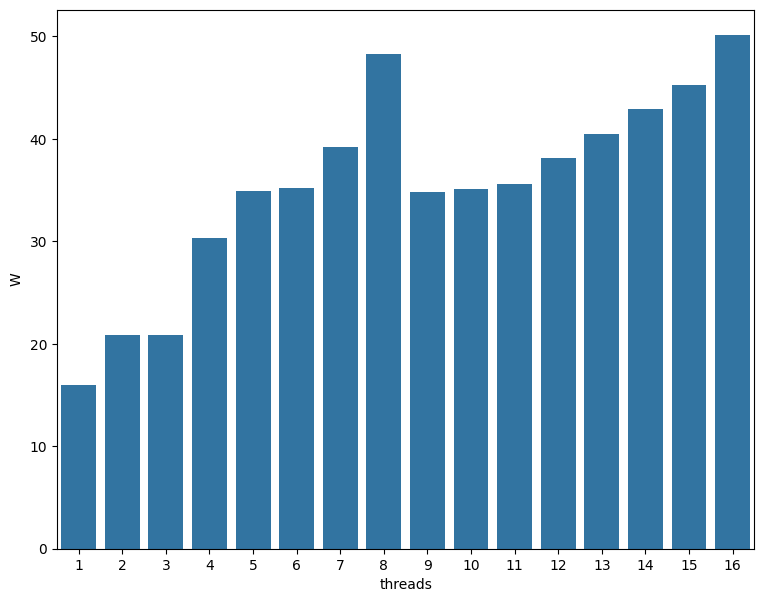

In [156]:
plt.figure(figsize=(9,7))
ax = sns.barplot(df, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

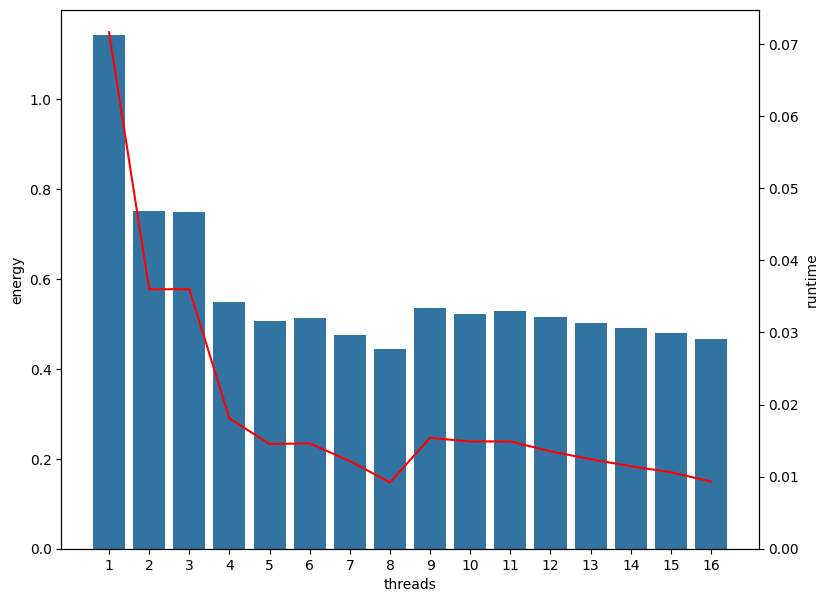

In [158]:
plt.figure(figsize=(9,7))

ax = sns.barplot(df, x='threads', y='energy')

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='runtime', color='r', ax=ax2)

ax2.set_ylim((0, None))

plt.show()

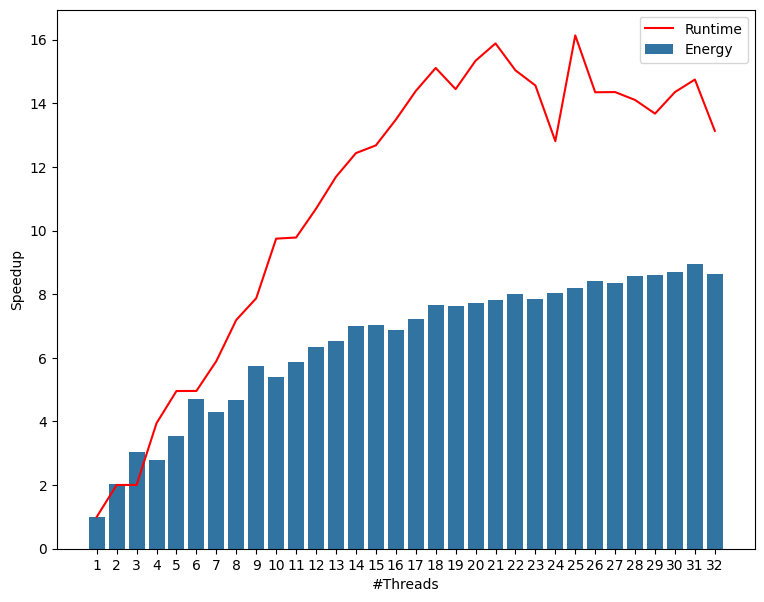

In [145]:
plt.figure(figsize=(9,7))

ax = sns.barplot(df_speedup, x='threads', y='energy-user', label='Energy')
sns.lineplot(df_speedup, x=df_speedup.index, y='runtime', label='Runtime', color='r', ax=ax)

ax.set_xlabel('#Threads')
ax.set_ylabel('Speedup')
ax.set_ylim((0, None))

plt.show()